# Data Visualisation 10 - Seaborn facet grid

In this notebook I demonstrate how to create small multiples. These are multiple small plots where the groups from a categrical variable are separated over different plots. This can be a useful way of visualising data or trends side-by-side. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
sns.set_style('darkgrid')

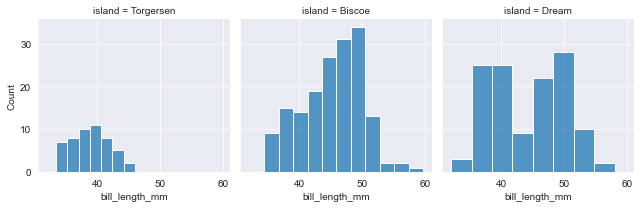

In [4]:
sns.FacetGrid(penguins, col='island').map(sns.histplot, 'bill_length_mm')

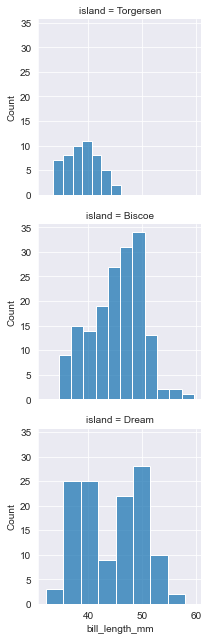

In [5]:
sns.FacetGrid(penguins, row='island').map(sns.histplot, 'bill_length_mm')

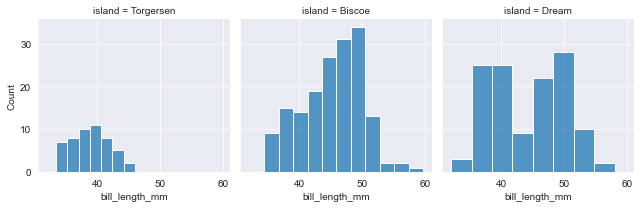

In [6]:
# Creating a facetgrid object. 
bl = sns.FacetGrid(penguins, col='island') 
bl.map(sns.histplot, 'bill_length_mm')

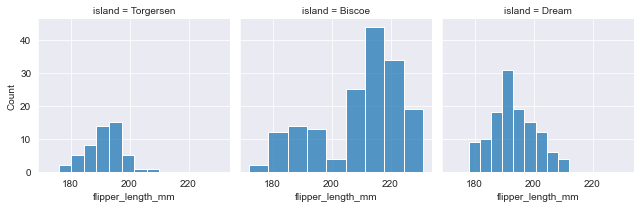

In [7]:
# Using map_dataframe:
fl = sns.FacetGrid(penguins, col='island') 
fl.map_dataframe(sns.histplot, x='flipper_length_mm')

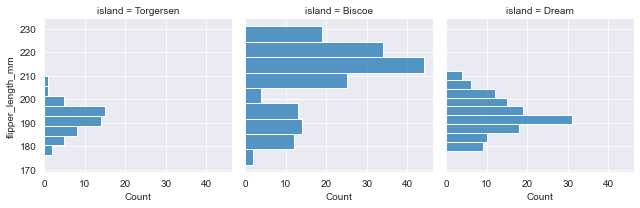

In [8]:
fl = sns.FacetGrid(penguins, col='island') 
fl.map_dataframe(sns.histplot, y='flipper_length_mm')

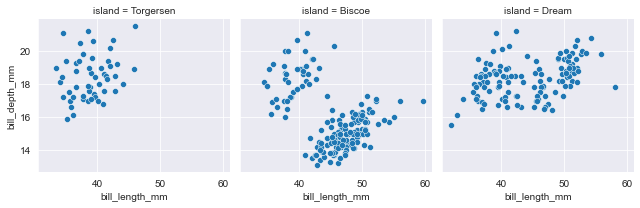

In [9]:
# Can specify the type of plot we want and have to supply the required positional arguments. 

blscat = sns.FacetGrid(penguins, col='island') 
blscat.map_dataframe(sns.scatterplot, x='bill_length_mm', y='bill_depth_mm')

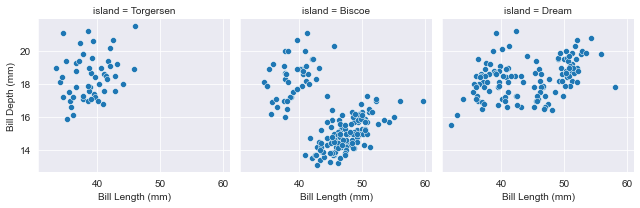

In [10]:
# Sets axis labels using the variable name as a default. We can edit this. 

blscat = sns.FacetGrid(penguins, col='island') 
blscat.map_dataframe(sns.scatterplot, x='bill_length_mm', y='bill_depth_mm')
blscat.set_axis_labels('Bill Length (mm)', 'Bill Depth (mm)')

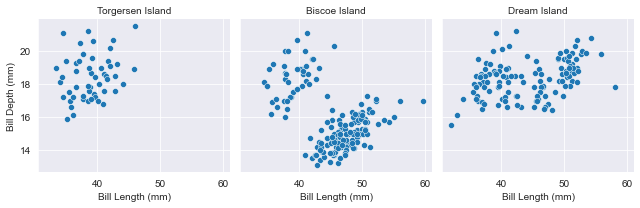

In [11]:
# We can also edit the titles for each column plot. 

blscat = sns.FacetGrid(penguins, col='island') 
blscat.map_dataframe(sns.scatterplot, x='bill_length_mm', y='bill_depth_mm')
blscat.set_axis_labels('Bill Length (mm)', 'Bill Depth (mm)')
blscat.set_titles(col_template='{col_name} Island')

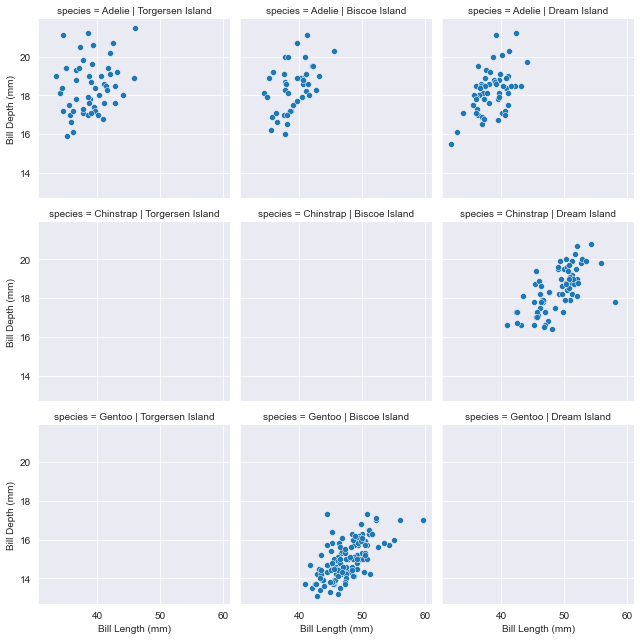

In [12]:
# We can combine our separation of plots by using both column and row arguments. 

blscat = sns.FacetGrid(penguins, col='island', row='species') 
blscat.map_dataframe(sns.scatterplot, x='bill_length_mm', y='bill_depth_mm')
blscat.set_axis_labels('Bill Length (mm)', 'Bill Depth (mm)')
blscat.set_titles(col_template='{col_name} Island')

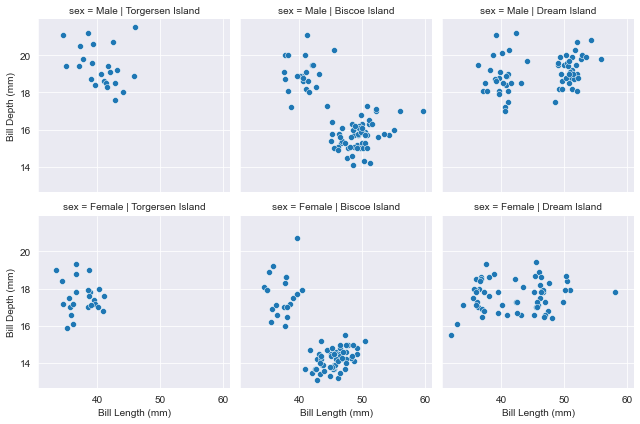

In [13]:
blscat = sns.FacetGrid(penguins, col='island', row='sex') 
blscat.map_dataframe(sns.scatterplot, x='bill_length_mm', y='bill_depth_mm')
blscat.set_axis_labels('Bill Length (mm)', 'Bill Depth (mm)')
blscat.set_titles(col_template='{col_name} Island')

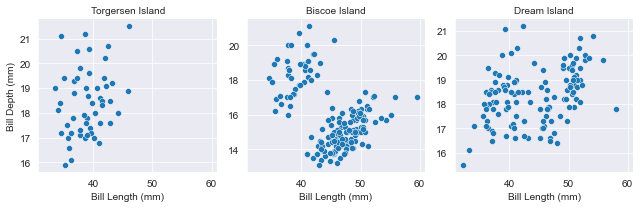

In [14]:
# Note that the y axis scale currently only appears on the first plot. We can change this using sharey. 
# Note that this can potentialy change the scale of each plot and seaborn may size the y axis individually. 
blscat = sns.FacetGrid(penguins, col='island', sharey=False) 
blscat.map_dataframe(sns.scatterplot, x='bill_length_mm', y='bill_depth_mm')
blscat.set_axis_labels('Bill Length (mm)', 'Bill Depth (mm)')
blscat.set_titles(col_template='{col_name} Island')

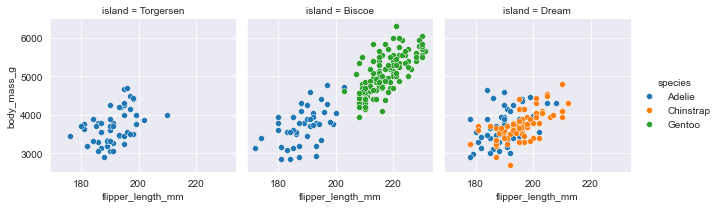

In [15]:
# We can separate data by other categories and group using the hue argument. 
# Note that this goes in the initial FacetGrid call. 
mass = sns.FacetGrid(penguins, col='island', hue='species') 
mass.map_dataframe(sns.scatterplot, x='flipper_length_mm', y='body_mass_g')
mass.add_legend()

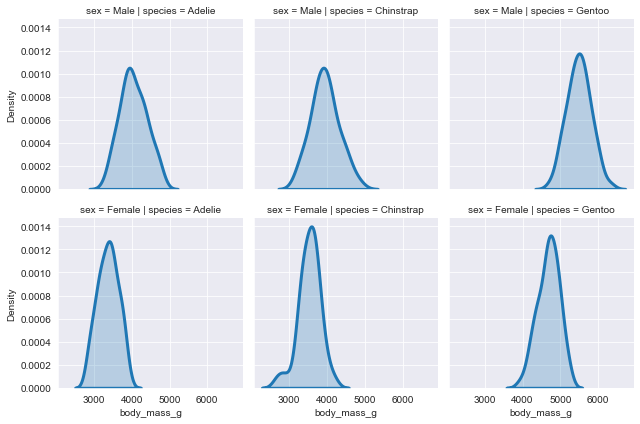

In [16]:
mass2 = sns.FacetGrid(penguins, col='species', row='sex') 
mass2.map_dataframe(sns.kdeplot, x='body_mass_g', lw=3, fill=True)